## Problem Statement

Fred, a loyal friend, has opened a burger bistro in Brisbane but is facing slow business. To attract customers, he plans an online advertising campaign targeting residents every weekday from 11:00 a.m. to 1:00 p.m. with 3,000 ads, costing one cent each. The ad text promotes his tasty burgers and directs users to his site. Fred, displeased with the blue text, decides to experiment with 30 different colors over a month, distributing 3,000 ads evenly by color daily. The ad software tracks views and clicks, storing the data in a table.

Now, Fred seeks your help to interpret the results of his experiment. He wants to identify a color that significantly outperforms blue in attracting ad clicks. Despite being skilled at burgers, Fred lacks data analysis expertise, and he offers free burgers for a year if you assist him in analyzing and comparing daily clicks in the table.

## Dataset Description

The ad-click data is stored in a .csv file named colored_ad_click_table.csv, where columns are separated by commas. The first line contains column labels such as Color, Click Count: Day 1, View Count: Day 1, and similar labels for the other 19 days of the experiment. The Color column represents 30 possible text colors. Columns Click Count and View Count for each day tally the clicks and views of colored ads on that specific day. Fred expects daily views to be 100 for each color. The file structure is organized, providing data on clicks and views for all 30 colors over 20 days of Fred's experiment.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load the data
df = pd.read_csv('colored_ad_click_table.csv')
df.head()

,Color,Click Count: Day 1,View Count: Day 1,Click Count: Day 2,View Count: Day 2,Click Count: Day 3,View Count: Day 3,Click Count: Day 4,View Count: Day 4,Click Count: Day 5,...,Click Count: Day 16,View Count: Day 16,Click Count: Day 17,View Count: Day 17,Click Count: Day 18,View Count: Day 18,Click Count: Day 19,View Count: Day 19,Click Count: Day 20,View Count: Day 20
0,Pink,21,100,20,100,14,100,30,100,12,...,23,100,15,100,22,100,19,100,20,100
1,Gray,27,100,27,100,26,100,17,100,29,...,25,100,21,100,27,100,25,100,24,100
2,Sapphire,30,100,32,100,30,100,26,100,32,...,33,100,30,100,30,100,30,100,25,100
3,Purple,26,100,21,100,16,100,17,100,23,...,22,100,20,100,26,100,25,100,33,100
4,Coral,26,100,24,100,25,100,27,100,36,...,26,100,21,100,22,100,26,100,25,100


In [3]:
df.shape

(30, 41)

In [4]:
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'View Count: Day 1',
       'Click Count: Day 2', 'View Count: Day 2', 'Click Count: Day 3',
       'View Count: Day 3', 'Click Count: Day 4', 'View Count: Day 4',
       'Click Count: Day 5', 'View Count: Day 5', 'Click Count: Day 6',
       'View Count: Day 6', 'Click Count: Day 7', 'View Count: Day 7',
       'Click Count: Day 8', 'View Count: Day 8', 'Click Count: Day 9',
       'View Count: Day 9', 'Click Count: Day 10', 'View Count: Day 10',
       'Click Count: Day 11', 'View Count: Day 11', 'Click Count: Day 12',
       'View Count: Day 12', 'Click Count: Day 13', 'View Count: Day 13',
       'Click Count: Day 14', 'View Count: Day 14', 'Click Count: Day 15',
       'View Count: Day 15', 'Click Count: Day 16', 'View Count: Day 16',
       'Click Count: Day 17', 'View Count: Day 17', 'Click Count: Day 18',
       'View Count: Day 18', 'Click Count: Day 19', 'View Count: Day 19',
       'Click Count: Day 20', 'View Count: Day 20'],
      dtyp

In [5]:
# list of colors
print(df.Color.values)

['Pink' 'Gray' 'Sapphire' 'Purple' 'Coral' 'Olive' 'Navy' 'Maroon' 'Teal'
 'Cyan' 'Orange' 'Black' 'Tan' 'Red' 'Blue' 'Brown' 'Turquoise' 'Indigo'
 'Gold' 'Jade' 'Ultramarine' 'Yellow' 'Virdian' 'Violet' 'Green'
 'Aquamarine' 'Magenta' 'Silver' 'Bronze' 'Lime']


In [6]:
# summary stats of Day 1 views & clicks
selected_cols = ['Color', 'Click Count: Day 1', 'View Count: Day 1']
df[selected_cols].describe()

,Click Count: Day 1,View Count: Day 1
count,30.000000,30.0
mean,23.533333,100.0
std,7.454382,0.0
min,12.000000,100.0
25%,19.250000,100.0
50%,24.000000,100.0
75%,26.750000,100.0
max,49.000000,100.0


In [7]:
# verify each color receives 100 daily views
view_cols = [column for column in df.columns if 'View' in column]
assert np.all(df[view_cols].values == 100)

In [8]:
# remove view count columns since we don't need it
# once we verified 100 daily views for each color for consistency in our analysis
df.drop(columns=view_cols, inplace=True)
print(df.columns)

Index(['Color', 'Click Count: Day 1', 'Click Count: Day 2',
       'Click Count: Day 3', 'Click Count: Day 4', 'Click Count: Day 5',
       'Click Count: Day 6', 'Click Count: Day 7', 'Click Count: Day 8',
       'Click Count: Day 9', 'Click Count: Day 10', 'Click Count: Day 11',
       'Click Count: Day 12', 'Click Count: Day 13', 'Click Count: Day 14',
       'Click Count: Day 15', 'Click Count: Day 16', 'Click Count: Day 17',
       'Click Count: Day 18', 'Click Count: Day 19', 'Click Count: Day 20'],
      dtype='object')


In [9]:
df.set_index('Color', inplace=True)

In [10]:
# summarize the % of daily ad clicks of blue color
df.T.Blue.describe()

count    20.000000
mean     28.350000
std       5.499043
min      18.000000
25%      25.750000
50%      27.500000
75%      30.250000
max      42.000000
Name: Blue, dtype: float64

The percentage of daily ad clicks of blue color ranges from 18% to 42%. On average, 28.35% of blue ads receive a click per view across 20 days.

In [11]:
# Drop the blue color & retain the rest for comparisons
df_not_blue = df.T.drop(columns='Blue')
df_not_blue.head(2)

Color,Pink,Gray,Sapphire,Purple,Coral,Olive,Navy,Maroon,Teal,Cyan,...,Ultramarine,Yellow,Virdian,Violet,Green,Aquamarine,Magenta,Silver,Bronze,Lime
Click Count: Day 1,21,27,30,26,26,26,38,21,25,24,...,49,14,27,15,14,24,18,26,19,20
Click Count: Day 2,20,27,32,21,24,19,29,29,25,22,...,41,24,23,22,25,28,21,24,19,19


In [12]:
def permutation_test(arr1, arr2):
    """
    Performs a permutation test to compare the means of two input arrays.

    Parameters:
    - arr1 (numpy array): First input array for comparison.
    - arr2 (numpy array): Second input array for comparison.

    Returns:
    - p_value (float): The calculated p-value representing the significance of the observed mean difference.
    """

    # Calculate means and observed difference
    mean_arr1 = arr1.mean()
    mean_arr2 = arr2.mean()
    obs_diff = abs(mean_arr1 - mean_arr2)

    # Combine arrays and initialize counter
    total_data = np.hstack([arr1, arr2])
    number_extreme_values = 0

    # Permutation Testing Loop
    for _ in range(30000):
        np.random.shuffle(total_data)
        sample_a_mean = total_data[:arr1.size].mean()
        sample_b_mean = total_data[arr1.size:].mean()

        # Check for extreme values
        if abs(sample_a_mean - sample_b_mean) >= obs_diff:
            number_extreme_values += 1

    # Calculate p-value
    p_value = number_extreme_values / 30000
    return p_value

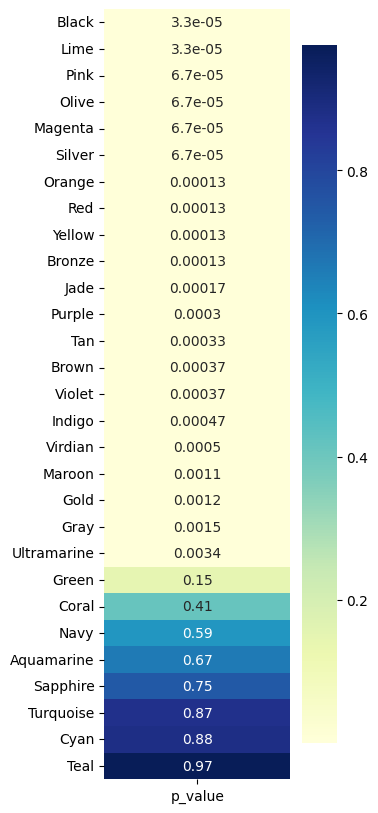

In [13]:
np.random.seed(0)

# Extract Blue clicks from the dataframe
blue_clicks = df.T.Blue.values

# Dictionary to store color-wise p-values
color_to_p_value = {}

# Calculate permutation test p-values for each color compared to Blue
for color, color_clicks in df_not_blue.items():
    color_to_p_value[color] = permutation_test(blue_clicks, color_clicks)

# Sort colors and p-values based on significance
sorted_colors, sorted_p_values = zip(*sorted(color_to_p_value.items(), key=lambda x: x[1]))

# Visualize results using a heatmap
plt.figure(figsize=(3, 10))
sns.heatmap([[pvalue] for pvalue in sorted_p_values],
            cmap='YlGnBu', annot=True, xticklabels=['p_value'],
            yticklabels=sorted_colors)
plt.show()

Most colors produce a p-value considerably below 0.05, indicating a significant deviation in ad-click percentages from blue. Notably, black has the lowest p-value, suggesting a substantial difference in ad-click performance compared to blue. However, from a design standpoint, black is not an optimal choice for clickability, as black text links are challenging to differentiate from regular text. This raises suspicion, prompting the question: what exactly is the difference between recorded clicks for black and blue?

In [18]:
# Finding the mean click rate of black
mean_black = df_not_blue.Black.mean()
print(f"Mean click-rate of black is {mean_black}")

Mean click-rate of black is 21.6


This figure is notably below the blue mean of 28.35. Consequently, the observed statistical difference in colors results from a lower number of individuals clicking on black. It is possible that other color low p-values can be linked to below-average click rates. To explore this further, let's filter out colors with a mean lower than that of blue and display the remaining colors.

In [14]:
remaining_colors = df[df.T.mean().values > blue_clicks.mean()].index
size = remaining_colors.size
print(f'{size} colors have on average more clicks than Blue.')
print('These colors are: ')
print(remaining_colors.values)

5 colors have on average more clicks than Blue.
These colors are: 
['Sapphire' 'Navy' 'Teal' 'Ultramarine' 'Aquamarine']


In [15]:
# Print the mean and p value for these 5 colors
for color, p_value in color_to_p_value.items():
    if color in remaining_colors:
        mean = df_not_blue[color].mean()
        print(f"{color} has a p-value of {p_value} and a mean of {mean}")

Sapphire has a p-value of 0.7457666666666667 and a mean of 28.9
Navy has a p-value of 0.5911666666666666 and a mean of 29.3
Teal has a p-value of 0.9745 and a mean of 28.45
Ultramarine has a p-value of 0.0034 and a mean of 34.2
Aquamarine has a p-value of 0.6654666666666667 and a mean of 29.2


Out of the five colors, only one, Ultramarine, has a p-value below our threshold of 0.05, specifically 0.0034. However, it's important to interpret this cautiously, considering that running multiple experiments increases the likelihood of obtaining a low p-value by chance. To address this concern and prevent potential pitfalls like p-value hacking, it is advisable to employ Bonferroni correction as the best approach for correction.

In [16]:
# adjust the significance level by dividing with number of planned experiments
significance_level = 0.05 / 29
print(f"Adjusted significance level is {significance_level}")

if color_to_p_value['Ultramarine'] <= significance_level:
    print("Our p-value is statistically significant")
else:
    print("Our p-value is not statistically significant")

Adjusted significance level is 0.001724137931034483
Our p-value is not statistically significant


In [17]:
# Hypothetically, if only 5 experiments were perform
# then the result might be statistically significant
hypothetical_sig_level = 0.05 / 5
print(f"Hypothetical significance level is {hypothetical_sig_level}")

if color_to_p_value['Ultramarine'] <= hypothetical_sig_level:
    print("Our hypothetical p-value would have been statistically significant")
else:
    print("Our hypothetical p-value would not have been statistically significant")

Hypothetical significance level is 0.01
Our hypothetical p-value would have been statistically significant


So what should Fred do now? Should he swap Blue for Ultramarine?

May be.

Adjusting the significance level by using bonferroni correction proved our result to be not statistically significant. However, if Fred decides to swap the color he wouldn't know whether Ultramarine color leads to high click rate than Blue. To find that out, he needs to run another experiment where half of displayed ads would be Blue and remaining half would be Ultramarine. Then compute the p value and he would know whether Ultramarine outperform Blue. In this scenario with a single experiment, Bonferroni correction would not be necessary.